<a href="https://colab.research.google.com/github/hufsaim/T03108701/blob/main/notebook_2024/Lab05_DTI_eigenvector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nibabel

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

## Data load

In [ ]:
h = nib.load('tensors.nii.gz')
meas = h.get_fdata()

In [ ]:
Dxx = np.rot90(meas[:,:,:,0,0])
Dxy = np.rot90(meas[:,:,:,0,1])
Dyy = np.rot90(meas[:,:,:,0,2])
Dxz = np.rot90(meas[:,:,:,0,3])
Dyz = np.rot90(meas[:,:,:,0,4])
Dzz = np.rot90(meas[:,:,:,0,5])

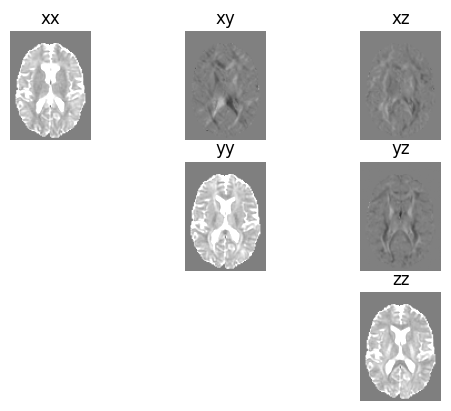

In [ ]:
zi = 28

plt.subplot(331)
plt.imshow(Dxx[:,:,zi],vmin=-1500,vmax=1500,cmap='gray')
plt.axis('off')
plt.title('xx')

plt.subplot(332)
plt.imshow(Dxy[:,:,zi],vmin=-1500,vmax=1500,cmap='gray')
plt.axis('off')
plt.title('xy')

plt.subplot(333)
plt.imshow(Dxz[:,:,zi],vmin=-1500,vmax=1500,cmap='gray')
plt.axis('off')
plt.title('xz')

plt.subplot(335)
plt.imshow(Dyy[:,:,zi],vmin=-1500,vmax=1500,cmap='gray')
plt.axis('off')
plt.title('yy')

plt.subplot(336)
plt.imshow(Dyz[:,:,zi],vmin=-1500,vmax=1500,cmap='gray')
plt.axis('off')
plt.title('yz')

plt.subplot(339)
plt.imshow(Dzz[:,:,zi],vmin=-1500,vmax=1500,cmap='gray')
plt.axis('off')
plt.title('zz')

plt.show()

## WM fiber bundle visualiztion using eigenvector

In [ ]:
# Matrix definition in a single voxel

zi=28
xi=50
yi=50

D = np.array([[Dxx[xi,yi,zi],Dxy[xi,yi,zi],Dxz[xi,yi,zi]],
              [Dxy[xi,yi,zi],Dyy[xi,yi,zi],Dyz[xi,yi,zi]],
              [Dxz[xi,yi,zi],Dyz[xi,yi,zi],Dzz[xi,yi,zi]]])
print(D)

[[ 363.90682983  100.78499603 -203.65518188]
 [ 100.78499603  772.72839355 -127.07707214]
 [-203.65518188 -127.07707214  709.09082031]]


In [ ]:
# calculate eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eig(D)
print(eigvals)
print(eigvecs)

[266.40401472 947.47462193 631.84740705]
[[ 0.914155   -0.34447338 -0.21367901]
 [-0.08234768 -0.67394651  0.73417639]
 [ 0.39691244  0.65355505  0.64445815]]


In [ ]:
# inner product of eigenvectors: orthogonality

print(np.dot(eigvecs[:,0],eigvecs[:,1]))
print(np.dot(eigvecs[:,0],eigvecs[:,2]))
print(np.dot(eigvecs[:,1],eigvecs[:,2]))

-3.885780586188048e-16
-3.3306690738754696e-16
4.996003610813204e-16


In [ ]:
# length of eigenvector: orthonormal basis
print(np.linalg.norm(eigvecs[:,0]))
print(np.linalg.norm(eigvecs[:,1]))
print(np.linalg.norm(eigvecs[:,2]))

1.0
1.0
1.0


In [ ]:
# Sort eigenvalues
p1 = eigvecs[:,np.argsort(eigvals)[2]]
p2 = eigvecs[:,np.argsort(eigvals)[1]]
p3 = eigvecs[:,np.argsort(eigvals)[0]]

print(p1,p2,p3)

[-0.34447338 -0.67394651  0.65355505] [-0.21367901  0.73417639  0.64445815] [ 0.914155   -0.08234768  0.39691244]


In [ ]:
# QΛQ^T = D
np.dot(np.dot(eigvecs,np.diag(eigvals)),eigvecs.transpose())

array([[ 363.90682983,  100.78499603, -203.65518188],
       [ 100.78499603,  772.72839355, -127.07707214],
       [-203.65518188, -127.07707214,  709.09082031]])

In [ ]:
# calculate color-coded fractional anisotropy map
eigmap = np.zeros((Dxx.shape[0],Dxx.shape[1],Dxx.shape[2],3))
eigvec = np.zeros((Dxx.shape[0],Dxx.shape[1],Dxx.shape[2],3))
famap = np.zeros((Dxx.shape[0],Dxx.shape[1],Dxx.shape[2]))
zi = 28
for xi in range(Dxx.shape[0]):
    for yi in range(Dxx.shape[1]):
        D = np.array([[Dxx[xi,yi,zi],Dxy[xi,yi,zi],Dxz[xi,yi,zi]],
                      [Dxy[xi,yi,zi],Dyy[xi,yi,zi],Dyz[xi,yi,zi]],
                      [Dxz[xi,yi,zi],Dyz[xi,yi,zi],Dzz[xi,yi,zi]]])
        eigvals, eigvecs = np.linalg.eig(D)
        eigmap[xi,yi,zi,0] = eigvals[np.argsort(eigvals)[2]]
        eigmap[xi,yi,zi,1] = eigvals[np.argsort(eigvals)[1]]
        eigmap[xi,yi,zi,2] = eigvals[np.argsort(eigvals)[0]]
        famap[xi,yi,zi] = np.sqrt((eigvals[0]-eigvals[1])**2+(eigvals[0]-eigvals[2])**2+(eigvals[1]-eigvals[2])**2)/np.sqrt(2*(eigvals[0]**2+eigvals[1]**2+eigvals[2]**2))
        eigvec[xi,yi,zi,:] = (famap[xi,yi,zi])*np.abs(eigvecs[:,np.argsort(eigvals)[2]])

/usr/local/lib/python3.10/dist-packages/matplotlib/cm.py:489: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


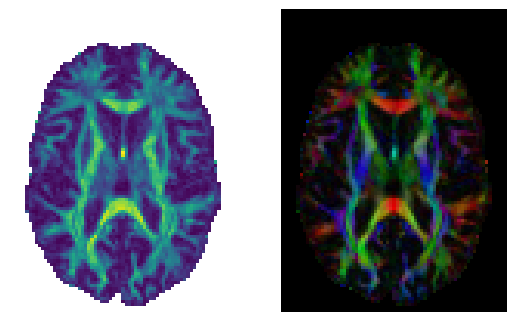

In [ ]:
plt.subplot(121)
plt.imshow(famap[:,:,zi])
plt.axis('off')
plt.subplot(122)
plt.imshow(eigvec[:,:,zi,:])
plt.axis('off')
plt.show()